In [0]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, normalize, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import datetime

In [0]:
data = pd.read_csv('https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD')

data['date'], data['hours'] = data['hour_beginning'].str.split(' ', 1).str

#delete empty values
data.dropna(axis=0, how='any', subset=['weather_summary'], inplace = True)


mis_val = data.isna().sum()
mis_val_percent = 100 * data.isna().sum() / len(data) #check if there are any gaps

# print('The number of missing cells {} and their percentage {}'.format(mis_val, mis_val_percent))
mis_val = data.isna().sum()
# mis_val

In [0]:
data['hours'] = pd.to_datetime(data['hours']).dt.strftime('%H')

def get(string):
  month , day, year = (int(x) for x in string.split('/')) 
  answer = datetime.date(year, month, day).weekday()
  return answer


data['month'] = data['date'].apply(lambda x: x[0:2])
data['day'] = data['date'].apply(get)
data['events'] = data.events.fillna('no_event')


#onehot encoding
data = data.join(pd.get_dummies(data['events'], prefix = 'event'))
data = data.join(pd.get_dummies(data['weather_summary'], prefix = 'weather'))
data = data.join(pd.get_dummies(data['day'], prefix = 'weekday'))
data = data.join(pd.get_dummies(data['month'], prefix = 'month'))
                 
data = data.drop(['location','Towards Manhattan', 'Towards Brooklyn', 'lat', 'long', 
                  'Location1', 'date', 'events', 'weather_summary', 'hour_beginning'], axis=1)

#normalization
data['temperature'] = (data['temperature'] - data['temperature'].min()) / (data['temperature'].max() - data['temperature'].min())
data['precipitation'] = (data['precipitation'] - data['precipitation'].min()) / (data['precipitation'].max() - data['precipitation'].min())


**Data analysis**

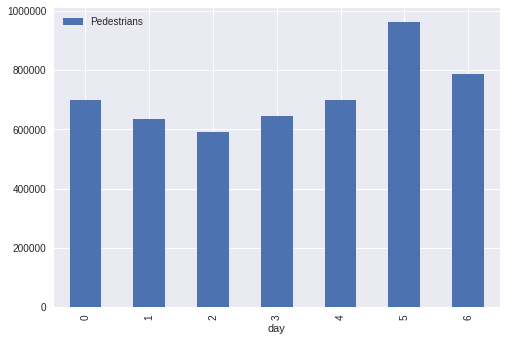

In [143]:
df = data[['day', 'Pedestrians']]
plt.clf()
df.groupby('day').sum().plot(kind='bar')
plt.show()

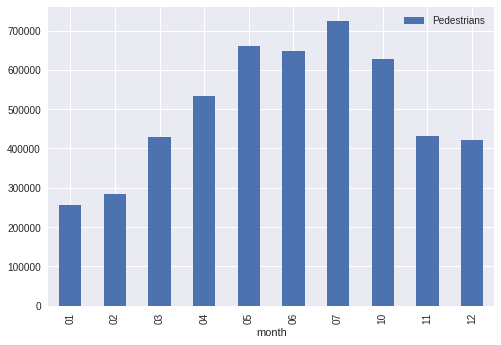

In [144]:
df = data[['month', 'Pedestrians']]
plt.clf()
df.groupby('month').sum().plot(kind='bar')
plt.show()